# Finding the features impacting the price of car

Import data

In [59]:
import numpy as np
import pandas as pd

In [60]:
data=pd.read_csv("C:/Users/AKANSHA BHATT/Downloads/automobileEDA.csv")

In [61]:
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Analyzing individual feature pattern by Visualization :

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [63]:
# Datatypes for each column
data.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [64]:
#Correlation between all features
data.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [65]:
#correlation between the following columns: bore, stroke,compression-ratio , and horsepower:
data[['bore', 'stroke','compression-ratio' ,'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


# For Continous Numerical Variables:

Positive linear Relationship

(0, 56508.931627966485)

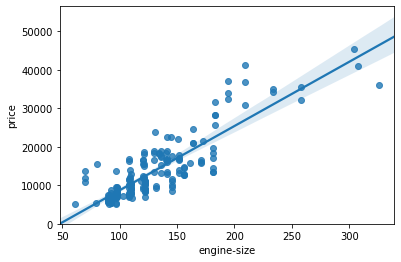

In [66]:
#Scatterplot of "engine-size" and "price":
sns.regplot(x="engine-size",y="price",data=data)
plt.ylim(0,)

In [67]:
data[["engine-size","price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Negative Linear Relationship

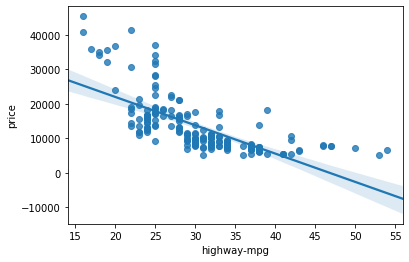

In [68]:
sns.regplot(x="highway-mpg",y="price",data=data)

In [69]:
data[["highway-mpg","price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


Weak Linear Relationship:

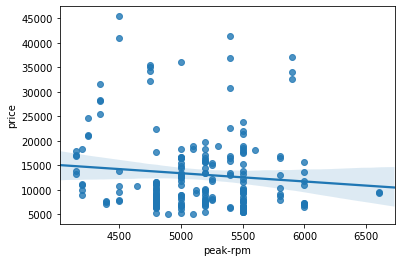

In [70]:
sns.regplot(x="peak-rpm",y="price",data=data)

In [71]:
data[["peak-rpm","price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [72]:
data[["stroke","price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


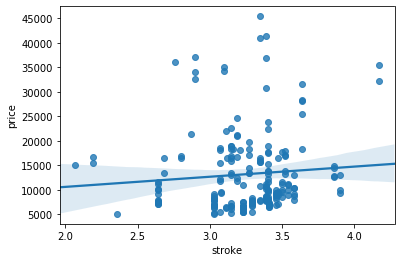

In [73]:
sns.regplot(x="stroke",y="price",data=data)

# For Categorical Variables:

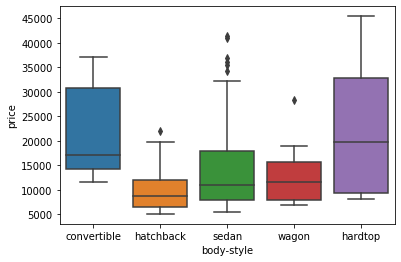

In [74]:
sns.boxplot(x="body-style",y="price",data=data)

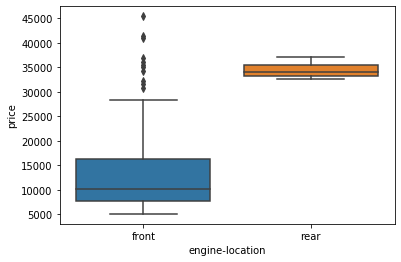

In [75]:
sns.boxplot(x="engine-location",y="price",data=data)

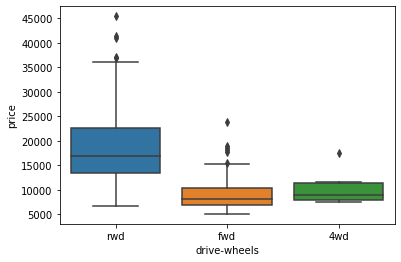

In [76]:
sns.boxplot(x="drive-wheels",y="price",data=data)

# Descriptive Statistical Analysis:

In [77]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [78]:
data.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


# Value Counts:

In [79]:
data['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

Converting series to dataframe

In [80]:
data['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


Save the result to new dataframe and then rename the column

In [81]:
drive_wheels_counts=data['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'},inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


Rename index to 'drive-wheels'

In [82]:
drive_wheels_counts.index.name='drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


Repeating the same as above for 'engine-location'



In [83]:
eng_loc_counts=data['engine-location'].value_counts().to_frame()
eng_loc_counts.rename(columns={'engine-location':'value_counts'},inplace=True)
eng_loc_counts.index.name='engine-location'
eng_loc_counts

,value_counts
engine-location,
front,198
rear,3


# Grouping:


In [84]:
data['drive-wheels'].nunique()

3

In [85]:
data_group_one=data[['drive-wheels','body-style','price']]

In [86]:
data_group_one=data_group_one.groupby(['drive-wheels'],as_index=False).mean()
data_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [87]:
data_group_two=data[['drive-wheels','body-style','price']]

In [88]:
data_group_two=data_group_two.groupby(['drive-wheels','body-style'],as_index=False).mean()
data_group_two

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Converting dataframe to pivot

In [89]:
pivot=data_group_two.pivot(index='drive-wheels',columns='body-style')
pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Filling mising values with 0

In [90]:
pivot=pivot.fillna(0)
pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [91]:
data_group_three=data[['body-style','price']]
data_group_three=data_group_three.groupby(['body-style'],as_index=False).mean()
data_group_three

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


# Heatmap:

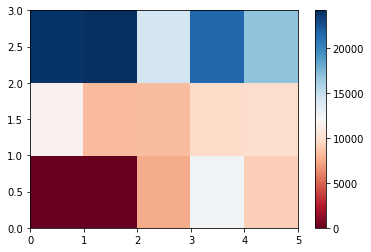

In [92]:
plt.pcolor(pivot,cmap='RdBu')
plt.colorbar()
plt.show()

Putting Labels:

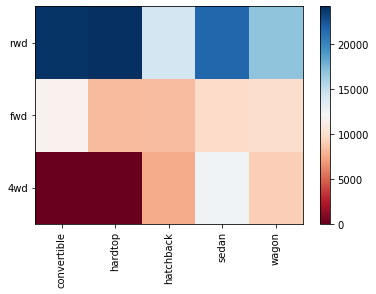

In [93]:
fig,ax=plt.subplots()
im=ax.pcolor(pivot,cmap='RdBu')

row_labels=pivot.columns.levels[1]
column_labels=pivot.index
ax.set_xticks(np.arange(pivot.shape[1])+0.5,minor=False)
ax.set_yticks(np.arange(pivot.shape[0])+0.5,minor=False)

ax.set_xticklabels(row_labels,minor=False)
ax.set_yticklabels(column_labels,minor=False)

plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

# Correlation And Causation

In [94]:
data.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [95]:
from scipy import stats

# Pearson Correlation Coefficiennt & P-value:

Wheel-base vs Price

In [96]:
pearson_coeff,p_value=stats.pearsonr(data['wheel-base'],data['price'])
print("Pearson Correlation Coefficient is",pearson_coeff,"with a p-value of p=",p_value)

Pearson Correlation Coefficient is 0.584641822265508 with a p-value of p= 8.076488270733218e-20


As the p-value is less than 0.001, both are statistcally significant and the linear relationship is quite strong

Horsepower vs Price

In [97]:
pearson_coeff,p_value=stats.pearsonr(data['horsepower'],data['price'])
print("Pearson Correaltion Coefficient is",pearson_coeff,"with a p-value of p=",p_value)

Pearson Correaltion Coefficient is 0.809574567003656 with a p-value of p= 6.369057428259557e-48


As the p-value is less than 0.001, both are statistcally significant and the linear relationship is quite strong

Length vs Price

In [98]:
pearson_coeff,p_value=stats.pearsonr(data['length'],data['price'])
print("Pearson Correlation Coefficient is",pearson_coeff,"with a p-value of p",p_value)

Pearson Correlation Coefficient is 0.6906283804483639 with a p-value of p 8.016477466159328e-30


As the p-value is less than 0.001, both are statistcally significant and the linear relationship is quite strong

Width vs Price

In [99]:
pearson_coeff,p_value=stats.pearsonr(data['width'],data['price'])
print("Pearson Correaltion Coefficient is",pearson_coeff,"with a value of p=",p_value)

Pearson Correaltion Coefficient is 0.7512653440522671 with a value of p= 9.200335510482432e-38


As the p-value is less than 0.001, both are statistcally significant and the linear relationship is quite strong.

Curb-Weight vs Price

In [100]:
pearson_coeff,p_value=stats.pearsonr(data['curb-weight'],data['price'])
print("Pearson Correaltion Coefficient is",pearson_coeff,"with a p-value of p",p_value)

Pearson Correaltion Coefficient is 0.8344145257702843 with a p-value of p 2.189577238894065e-53


As the p-value is less than 0.001, both are statistcally significant and the linear relationship is quite strong.

Engine-size vs Price

In [101]:
pearson_coeff,p_value=stats.pearsonr(data['engine-size'],data['price'])
print("Pearson Correlation Coefficient is",pearson_coeff,"with a value of p=",p_value)

Pearson Correlation Coefficient is 0.8723351674455182 with a value of p= 9.265491622200232e-64


As the p-value is less than 0.001, both are statistcally significant and the linear relationship is quite strong.

Bore vs Price

In [102]:
pearson_coeff,p_value=stats.pearsonr(data['bore'],data['price'])
print("Pearson Correlation Coefficienr is",pearson_coeff,"with a value of p=",p_value)

Pearson Correlation Coefficienr is 0.5431553832626604 with a value of p= 8.049189483935032e-17


As the p-value is less than 0.001, both are statistcally significant and the linear relationship is quite strong.

City-mpg vs Price

In [103]:
pearson_coeff,p_value=stats.pearsonr(data['city-mpg'],data['price'])
print("Pearson Correlation coefficient is",pearson_coeff,"with a value of p=",p_value)

Pearson Correlation coefficient is -0.6865710067844678 with a value of p= 2.321132065567641e-29


As the p-value is less than 0.001, both are statistcally significant and as the Pearson Correaltion coeffcient is -0.68,the relationship is negative.

Highway-mpg vs Price

In [104]:
pearson_coeff,p_value=stats.pearsonr(data['highway-mpg'],data['price'])
print("Pearson Correaltion Coefficient is",pearson_coeff,"with a p-value of p=",p_value)

Pearson Correaltion Coefficient is -0.704692265058953 with a p-value of p= 1.7495471144476358e-31


As the p-value is less than 0.001, both are statistcally significant and as the Pearson Correaltion coeffcient is -0.70,the relationship is negative.

# Anova

In [105]:
test=data_group_two[['drive-wheels','price']].groupby(['drive-wheels'])
test.head(5)

,drive-wheels,price
0,4wd,7603.000000
1,4wd,12647.333333
2,4wd,9095.750000
3,fwd,11595.000000
4,fwd,8249.000000
5,fwd,8396.387755
6,fwd,9811.800000
7,fwd,9997.333333
8,rwd,23949.600000
9,rwd,24202.714286


In [106]:
data_group_two

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [107]:
test.get_group('4wd')['price']

0     7603.000000
1    12647.333333
2     9095.750000
Name: price, dtype: float64

In [108]:
f_value,p_value=stats.f_oneway(test.get_group('4wd')['price'],test.get_group('rwd')['price'])
print("ANOVA results: F=",f_value,",P=",p_value)

ANOVA results: F= 13.603994177561603 ,P= 0.010228629764546682


The value of F and P shows moderate evidence that correlation is signigicant

fwd and rwd

In [109]:
f_value,p_value=stats.f_oneway(test.get_group('fwd')['price'],test.get_group('rwd')['price'])
print("ANOVA results: F=",f_value,",P=",p_value)

ANOVA results: F= 26.75473847377244 ,P= 0.0008505298615827271


The F-value and P-value shows moderate evidence that correlation is signigicant



4wd and fwd

In [110]:
f_value,p_value=stats.f_oneway(test.get_group('4wd')['price'],test.get_group('fwd')['price'])
print("ANOVA results: F=",f_value,",P=",p_value)

ANOVA results: F= 0.015958539708919313 ,P= 0.9035999352040226


The F-value and p-value shows no evidence that correlation is signigicant

4wd and rwd

In [111]:
f_value,p_value=stats.f_oneway(test.get_group('4wd')['price'],test.get_group('rwd')['price'])
print("ANOVA results: F=",f_value,",P=",p_value)

ANOVA results: F= 13.603994177561603 ,P= 0.010228629764546682


The F-value and P-value shows moderate evidence that correlation is signigicant

# Result:

The important variables fo predicting the car price are : Engine-size,
Wheel-base,
Horsepower,
Length,
Width,
Bore,
Highway-mpg,
City-mpg,
Curb-weight.
    